In [ ]:
## importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [123]:
## importing data 
df= pd.read_excel("D:/Lecture file/30 th lecture 20 april/Files/5. Clustering/EastWestAirlines.xlsx",sheet_name='data', header=0)
df.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


## cleaning and checking data

In [147]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'PCA1', 'PCA2'],
      dtype='object')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                3999 non-null   int64  
 1   Balance            3999 non-null   int64  
 2   Qual_miles         3999 non-null   int64  
 3   cc1_miles          3999 non-null   int64  
 4   cc2_miles          3999 non-null   int64  
 5   cc3_miles          3999 non-null   int64  
 6   Bonus_miles        3999 non-null   int64  
 7   Bonus_trans        3999 non-null   int64  
 8   Flight_miles_12mo  3999 non-null   int64  
 9   Flight_trans_12    3999 non-null   int64  
 10  Days_since_enroll  3999 non-null   int64  
 11  Award?             3999 non-null   int64  
 12  PCA1               3999 non-null   float64
 13  PCA2               3999 non-null   float64
 14  Cluster            3999 non-null   int32  
dtypes: float64(2), int32(1), int64(12)
memory usage: 453.1 KB


In [209]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
PCA1                 0
PCA2                 0
Cluster              0
dtype: int64

In [211]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,PCA1,PCA2,Cluster
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3.999000e+03,3.999000e+03,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,5.685763e-17,-5.685763e-17,0.674919
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,2.067719e+00,1.650691e+00,0.468464
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,-1.777722e+01,-7.837335e+00,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,-1.150259e+00,-8.170840e-01,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,4.856288e-01,7.592882e-02,1.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.603345e+00,4.437697e-01,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,2.512770e+00,2.505605e+01,1.000000


 ## scaling down the value  by using - standardScaler 

In [149]:
## scaling down value beacuse of high amount outlier in data
df_cluster = df.drop(columns=['ID#'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
X = scaled_data
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  8.17557193e-01, -1.11673396e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  8.10029161e-01, -1.08169928e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.00957663e-01, -1.32604284e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00,  4.40249783e-02, -3.74215532e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  9.37255933e-01,  4.34766453e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.11122101e+00,  1.50166724e-01]])

In [151]:
X_df = pd.DataFrame(X, columns=df_cluster.columns)
print(X_df.head()) 

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

     Award?      PCA1      PCA2  
0 -0.766919  0.817557 -0.111673  
1 -0.766919  0.810029 -0.108170  
2 -0.766919  0.70095

In [193]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[51987.000000000015,
 40224.314910207635,
 33416.007620285,
 31113.1147995475,
 27361.728752971052,
 24800.988838462028,
 23331.389583996453,
 21890.106270147153,
 18533.577864227587,
 17115.69343971413]

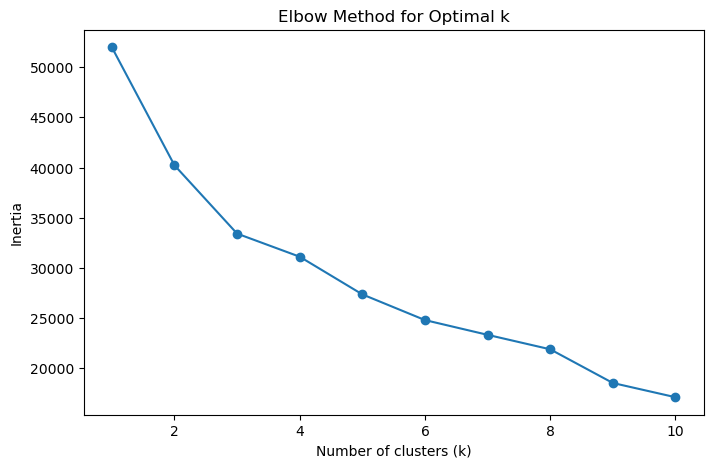

In [201]:
## elbow line chart for clustring
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [266]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)
df['Cluster'] = cluster_labels

In [268]:
df.groupby("Cluster").mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,PCA1,PCA2
Cluster,,,,,,,,,,,,,,
0,1732.183333,185411.655556,913.694444,2.161111,1.044444,1.000000,30466.700000,26.122222,5177.072222,15.000000,4692.088889,0.805556,-4.488592,4.784410
1,2227.417323,44894.372328,99.138358,1.292088,1.017998,1.000375,5300.611549,7.319835,190.965504,0.598425,3721.719160,0.212973,1.162557,0.288609
2,1566.795139,122590.555556,127.992188,3.820312,1.001736,1.041667,42483.943576,19.246528,345.993924,1.039062,4947.671875,0.666667,-1.990099,-1.415724


### visualization of k-mean clustering 

In [271]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

In [273]:
pca.explained_variance_ratio_

array([0.32879934, 0.20954612])

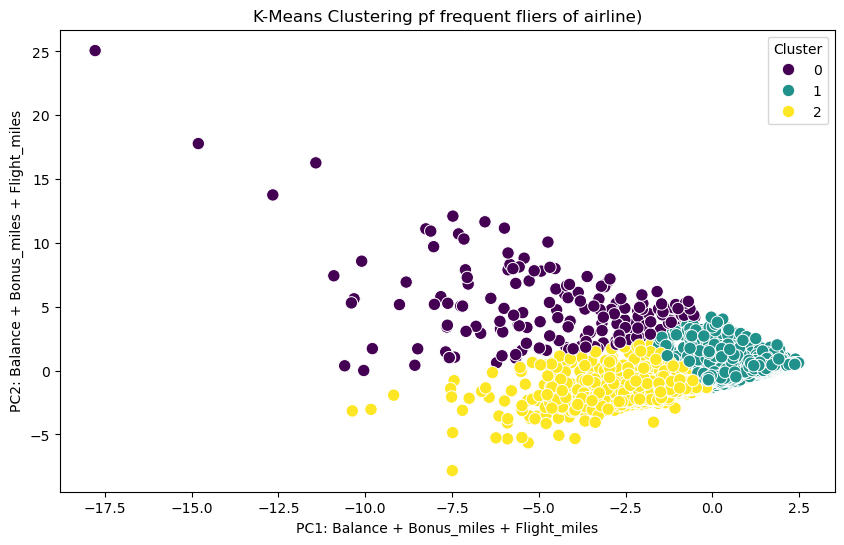

In [277]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=80)
plt.title("K-Means Clustering pf frequent fliers of airline)")
plt.xlabel("PC1: Balance + Bonus_miles + Flight_miles")
plt.ylabel("PC2: Balance + Bonus_miles + Flight_miles")
plt.show()

In [279]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df)
sil_kmeans = silhouette_score(X,cluster_labels)

## k-mean score

In [286]:
print(f"silhouete Score for Eastwestairline data - k_mean :{sil_kmeans}")

silhouete Score for Eastwestairline data - k_mean :0.3451899762197205
